# 20220122 Initial Analysis

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

## Edit Me
from imaka.reduce.nights import reduce_2022_01_22 as redu
night = '20220122'
fld = 'Beehive-W'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
## Had an issue with stacking, the gfol
for key in list(redu.dict_images.keys()):
    for i in range(len(redu.dict_images[key])):
        img_num = redu.dict_images[key]
        suf = redu.dict_suffix[key]
        test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)
        
        stars = Table.read(root_dir + f'reduce/{fld}/bin2/' + test_img_base + '_clean_bin2_stars_stats_mdp.fits')
        print(f"key: {key} image {img_num[i]} stars: {len(stars)}")  

key: LS_5wfs_1 image 11 stars: 9
key: LS_5wfs_1 image 19 stars: 7
key: LS_5wfs_1 image 23 stars: 5
key: LS_5wfs_1 image 27 stars: 7
key: LS_5wfs_1 image 31 stars: 6
key: LS_5wfs_1 image 35 stars: 16
key: LS_5wfs_1 image 39 stars: 22
key: LS_5wfs_1 image 43 stars: 18
key: LS_5wfs_1 image 47 stars: 79
key: LS_5wfs_1 image 51 stars: 686
key: LS_5wfs_1 image 55 stars: 321
key: LS_5wfs_1 image 59 stars: 287
key: LS_3wfs_s_1 image 12 stars: 5
key: LS_3wfs_s_1 image 16 stars: 11
key: LS_3wfs_s_1 image 20 stars: 9
key: LS_3wfs_s_1 image 24 stars: 10
key: LS_3wfs_s_1 image 28 stars: 15
key: LS_3wfs_s_1 image 32 stars: 6
key: LS_3wfs_s_1 image 36 stars: 19
key: LS_3wfs_s_1 image 40 stars: 9
key: LS_3wfs_s_1 image 44 stars: 37
key: LS_3wfs_s_1 image 48 stars: 125
key: LS_3wfs_s_1 image 52 stars: 684
key: LS_3wfs_s_1 image 56 stars: 403
key: LS_3wfs_s_1 image 60 stars: 214
key: LS_3wfs_w_1 image 13 stars: 9
key: LS_3wfs_w_1 image 17 stars: 10
key: LS_3wfs_w_1 image 21 stars: 9
key: LS_3wfs_w_1 ima

## Reduction inputs

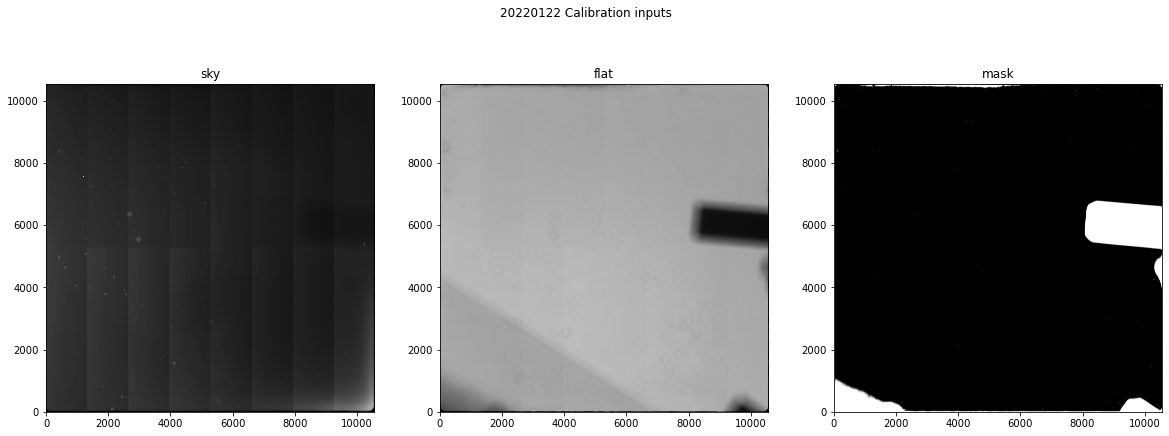

In [2]:
## sky, flats, and mask
sky_f = redu.sky_dir + "beehive_sky.fits"
flat_f = redu.calib_dir + "domeflat.fits"
mask_f = redu.calib_dir + "domemask.fits"

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,7))
fig.suptitle(night + ' Calibration inputs')

ax0.set_title('sky')
image_data = fits.getdata(sky_f)
ax0.imshow(image_data, cmap='gray', vmin=0, vmax=1000, origin='lower')

ax1.set_title('flat')
image_data = fits.getdata(flat_f)
ax1.imshow(image_data, cmap='gray', vmin=0, vmax=1.5, origin='lower')

ax2.set_title('mask')
image_data = fits.getdata(mask_f)
ax2.imshow(image_data, cmap='gray', vmin=0, vmax=1, origin='lower')

plt.show()

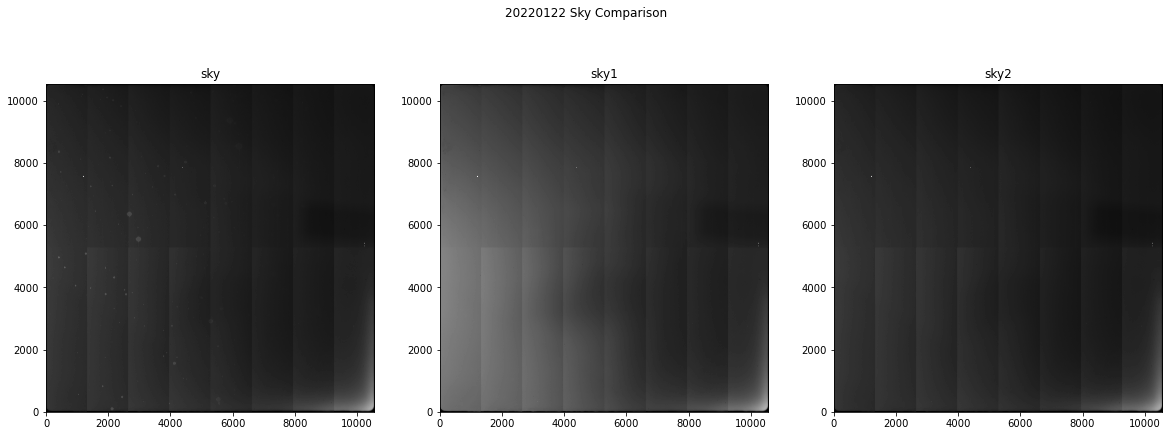

In [6]:
# sky comparison
sky_f = redu.sky_dir + "beehive_sky.fits"
sky_f1 = redu.sky_dir + "beehive_sky1.fits"
sky_f2 = redu.sky_dir + "beehive_sky2.fits"

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,7))
fig.suptitle(night + ' Sky Comparison')

ax0.set_title('sky')
image_data = fits.getdata(sky_f)
ax0.imshow(image_data, cmap='gray', vmin=0, vmax=1000, origin='lower')

ax1.set_title('sky1')
image_data = fits.getdata(sky_f1)
ax1.imshow(image_data, cmap='gray', vmin=0, vmax=1000, origin='lower')

ax2.set_title('sky2')
image_data = fits.getdata(sky_f2)
ax2.imshow(image_data, cmap='gray', vmin=0, vmax=1000, origin='lower')

plt.show()

## Real time plots

In [ ]:
# Enter chosen file
test_img_base = 'sta047n5wfs_c_scan' # this is the test single code

In [52]:
# pick a file based on key
key = 'LS_3wfs_s_2'
i=5

img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 1.000"


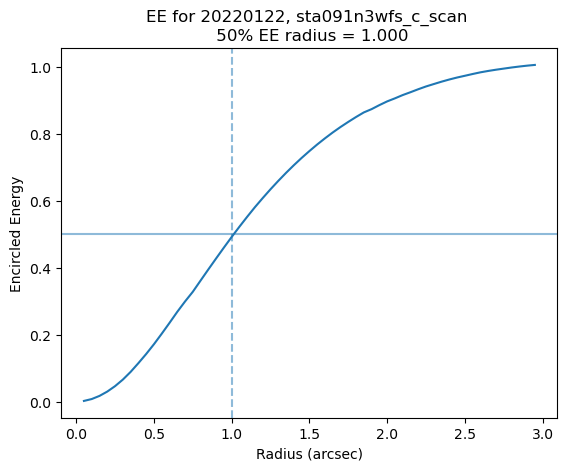

In [53]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

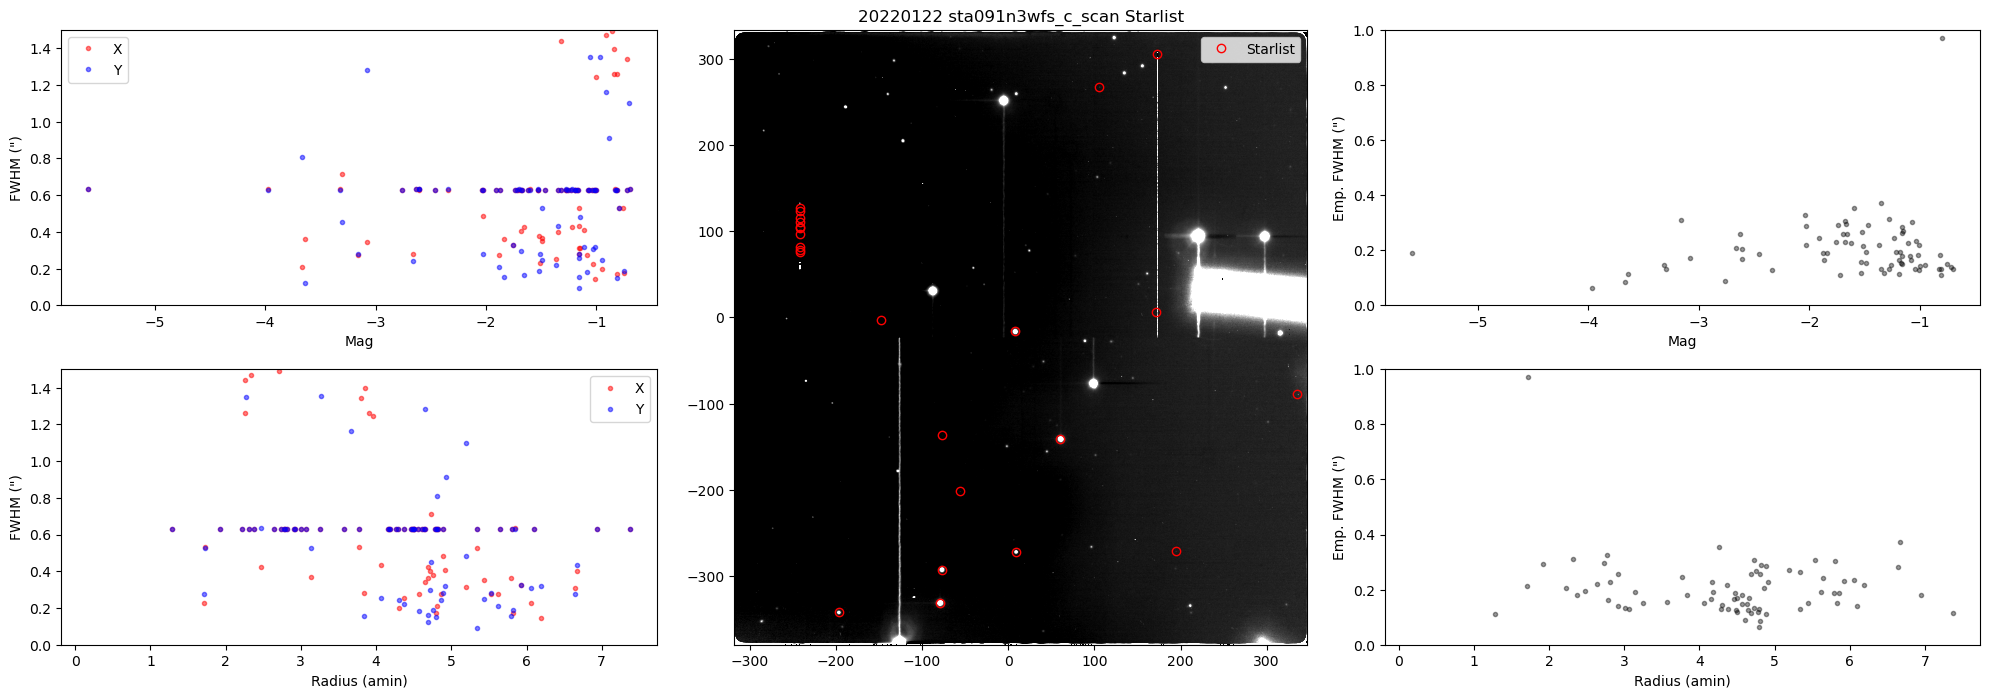

x: fwhm_x_avg = 0.88" fwhm_x_med = 0.63" fwhm_x_std = 0.60"
x: fwhm_x_avg = 0.88" fwhm_x_med = 0.63" fwhm_x_std = 0.60"


In [54]:
reload(plot_redu)
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night, rebinned=True)

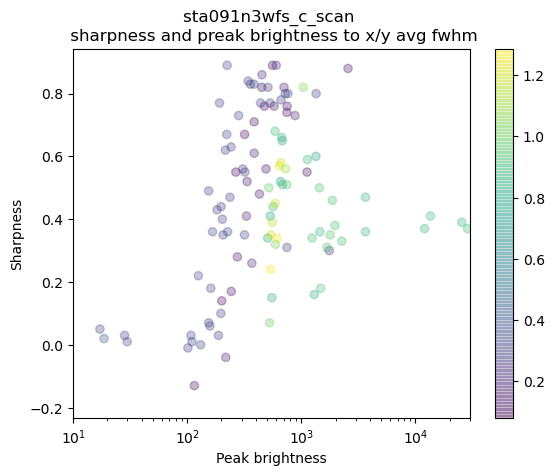

In [55]:
from astropy import table
# num pix vs fwhm
stars1 = table.Table.read(root_dir + f'reduce/{fld}/bin2/' + test_img_base + '_clean_bin2_stars.txt', format='ascii')
#stars1 = table.Table.read(root_dir + f'reduce/{fld}/bin2/' + test_img_base + '_clean_bin2_stars_stats_mdp.fits')

stars = stars1#[np.average([stars1['x_fwhm'], stars1['y_fwhm']], axis=0) < 20]
#stars = stars[stars['peak'] > 50]
plt.scatter(stars['peak'], stars['sharpness'], c=np.average([stars['x_fwhm'], stars['y_fwhm']], axis=0)*stats.meta['SCALE'], alpha=0.3)
plt.xlim(10, 30000)
plt.xscale('log')
plt.xlabel("Peak brightness")
plt.ylabel("Sharpness")
plt.title(test_img_base+ " \n sharpness and preak brightness to x/y avg fwhm")
plt.colorbar()

In [29]:
len(stars)

13

In [16]:
img, i_hdr = fits.getdata(root_dir + f'{fld}/' + test_img_base + '.fits', header=True)

In [19]:
reload(redu)
reload(redu.redu)
redu.redu.write_rebin(f'{redu.out_dir}' + test_img_base + '_clean.fits', 2)

In [22]:
img, i_hdr = fits.getdata(f'{redu.out_dir}' + test_img_base + '_clean_bin2.fits', header=True)

In [23]:
i_hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5280                                                  
NAXIS2  =                 5280                                                  
SYSTIME = '09:53:07.524377'                                                     
SYSDATE = '2022-01-22'                                                          
FRAMENUM=                  346                                                  
RA      = ' 08:40:06.452'      / Actual Right Ascension at Base Epoch           
DEC     = ' 19:39:44.855'      / Actual Declination at Base Epoch               
EPOCH   =               2000.0 / Base Epoch                                     
HA      = '-01:03:11.880'      / Hour Angle (hours)                             
ST      = ' 07:38:11.40'    

Play with a star list and look at trends in FWHM, etc. 

## Night-Long Stats

In [11]:
stats = Table.read(root_dir + 'reduce/stats/stats_LS_5wfs_2.fits')

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std']


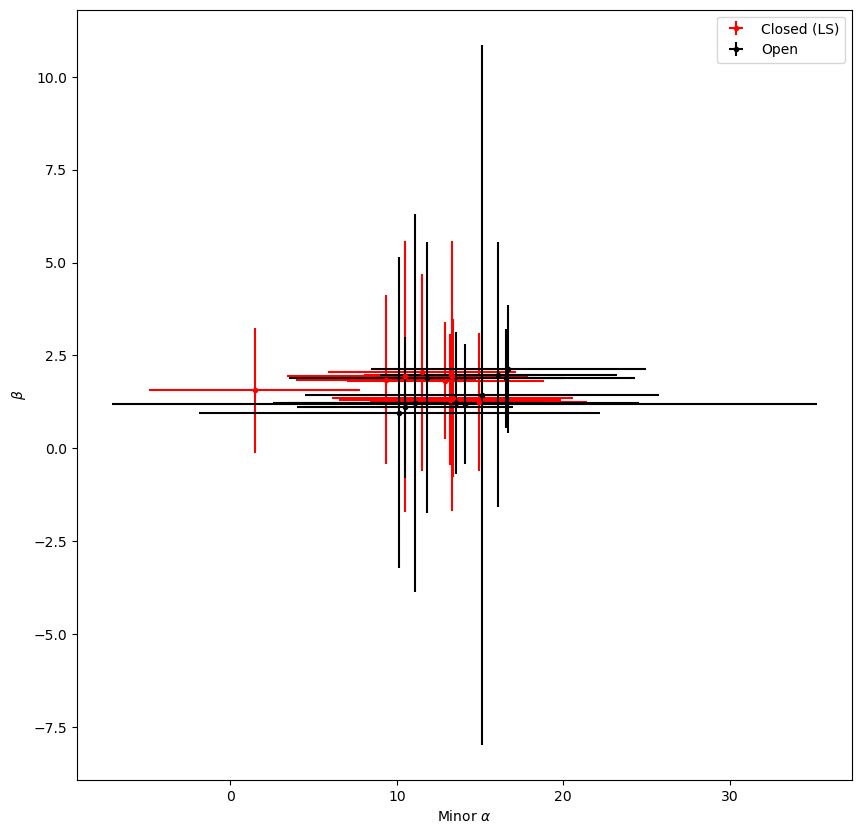

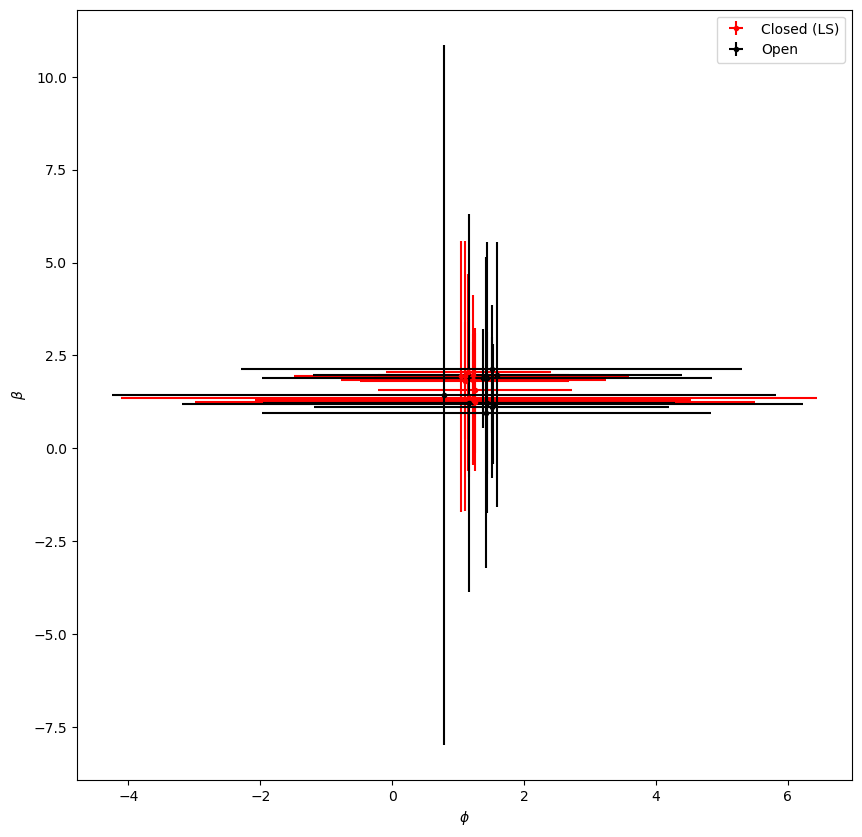

In [32]:
# stats by star 
stats_c = Table.read(root_dir + 'reduce/stats/stats_LS_5wfs_2.fits')
stats_o = Table.read(root_dir + 'reduce/stats/stats_open_2.fits')

# stats by stack? => doesn't work
#stats_c = Table.read(root_dir + 'reduce/stacks/fld2_stack_LS_c_stars_stats_mdp.fits')
#stats_o = Table.read(root_dir + 'reduce/stacks/fld2_stack__o_stars_stats.fits')

print(stats.colnames)

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Minor Alpha'], stats_c['Beta'], xerr=stats_c['Minor Alpha std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Minor Alpha'], stats_o['Beta'], xerr=stats_o['Minor Alpha std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'Minor $\alpha$')
plt.ylabel(r'$\beta$')
plt.legend()

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Phi'], stats_c['Beta'], xerr=stats_c['Phi std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Phi'], stats_o['Beta'], xerr=stats_o['Phi std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\beta$')
plt.legend()

## Star STATS

In [17]:
suffixes = list(redu.dict_suffix.keys())
suffixes

['LS_3wfs_s_1',
 'LS_3wfs_w_1',
 'LS_5wfs_1',
 'open_1',
 'LS_3wfs_s_2',
 'LS_3wfs_w_2',
 'LS_5wfs_2',
 'open_2']

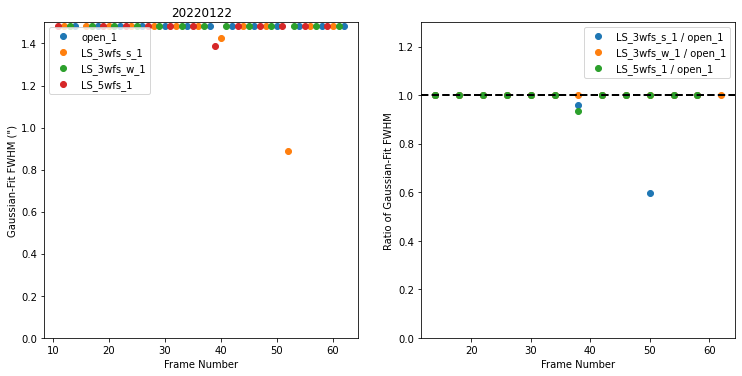

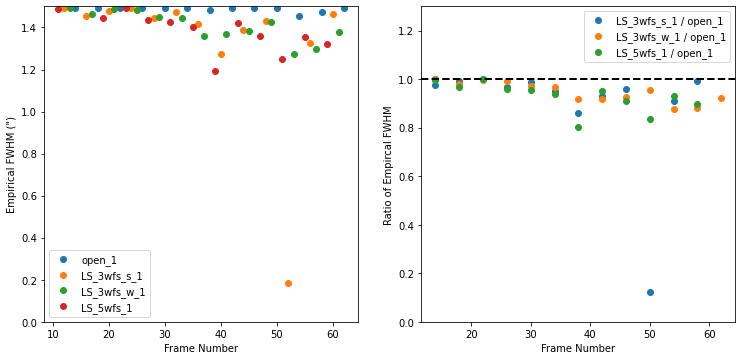

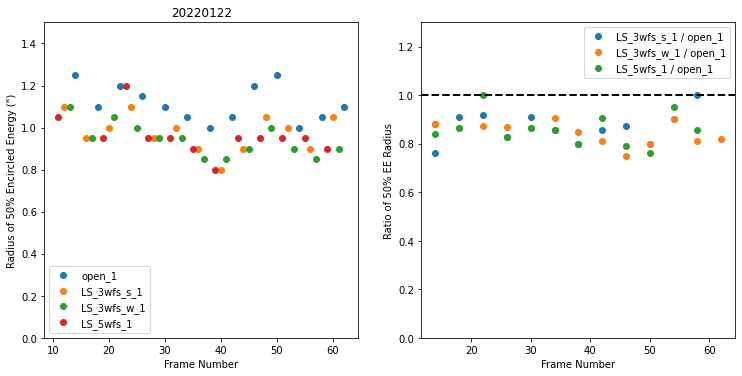

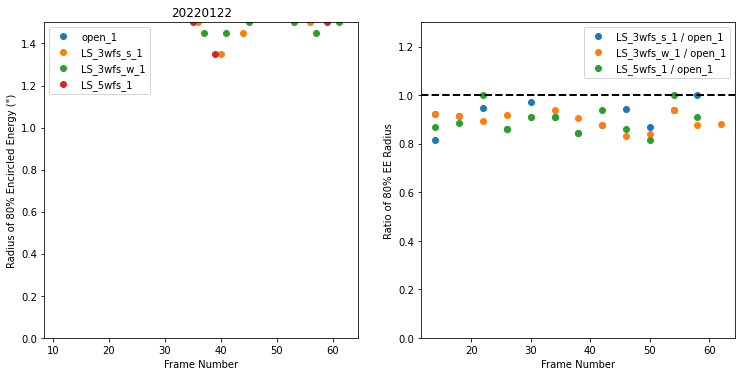

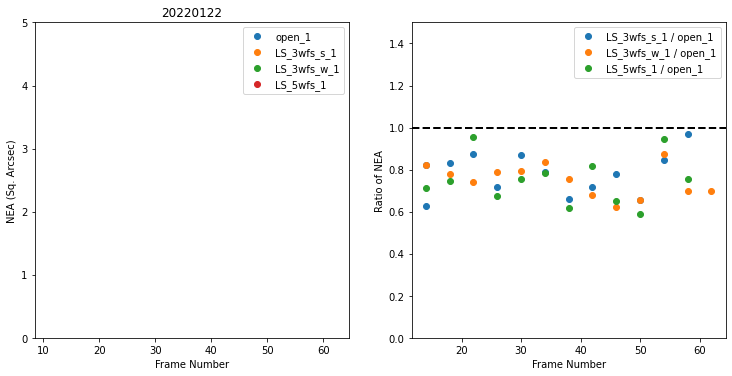

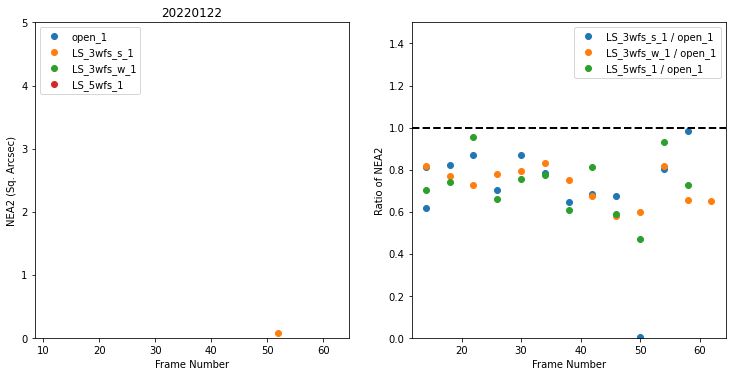

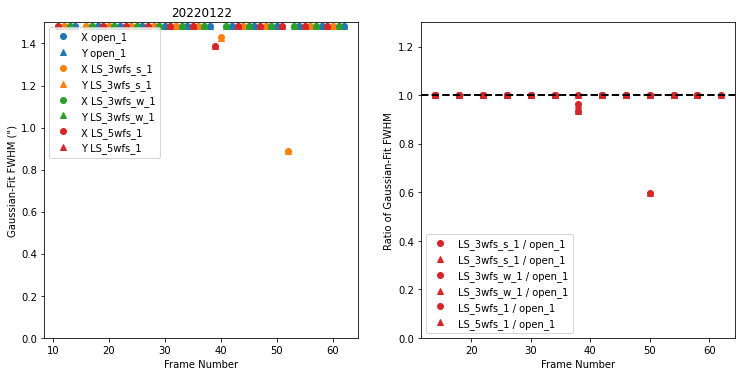

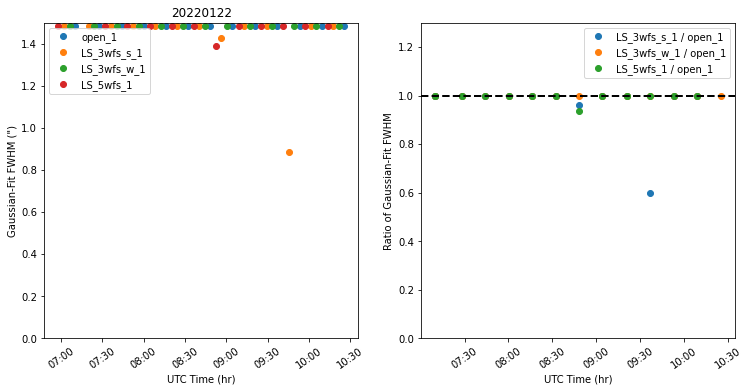

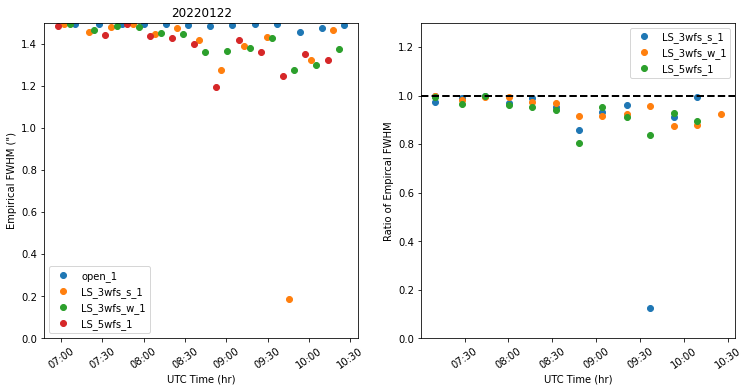

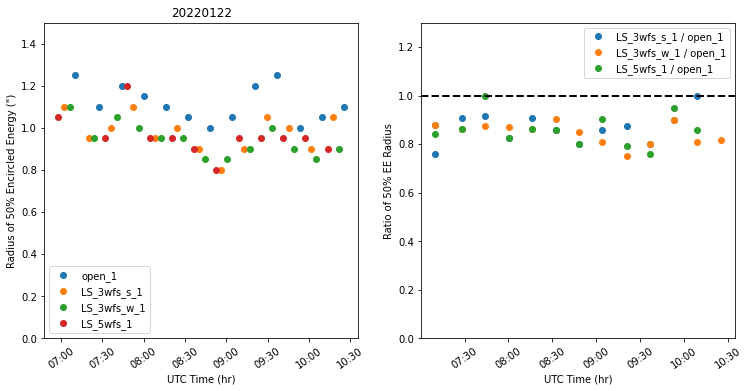

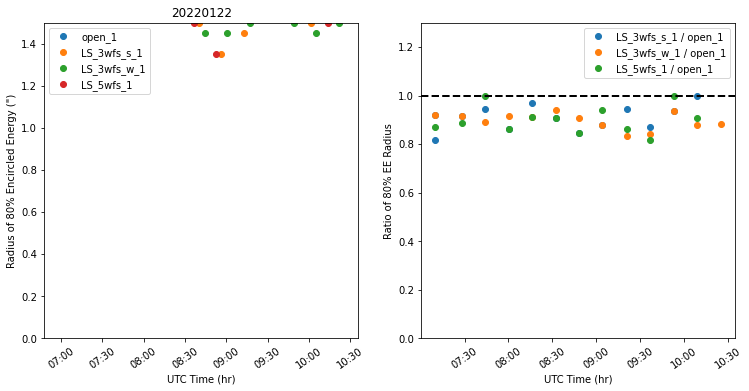

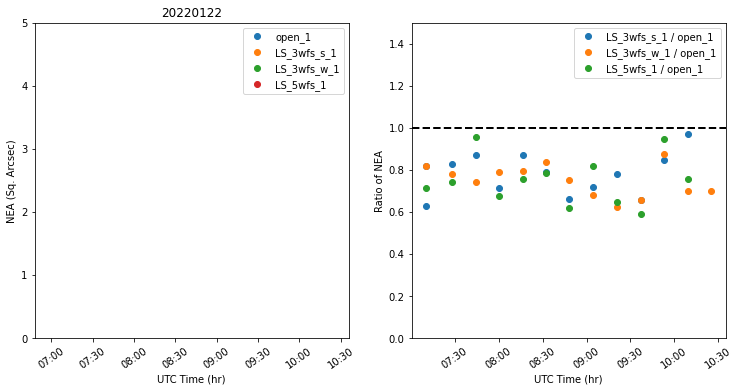

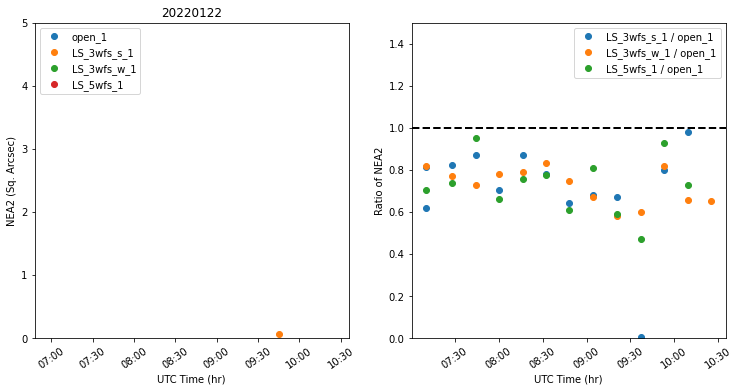

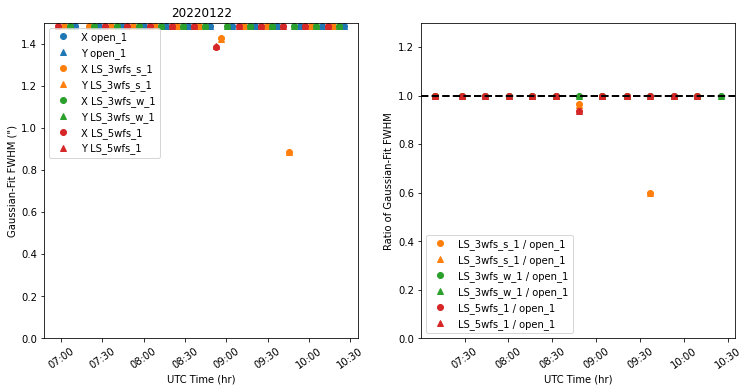

In [18]:
suffixes = ['open_1', 'LS_3wfs_s_1', 'LS_3wfs_w_1', 'LS_5wfs_1']
plot_stats.plot_stack_stats(night, suffixes=suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

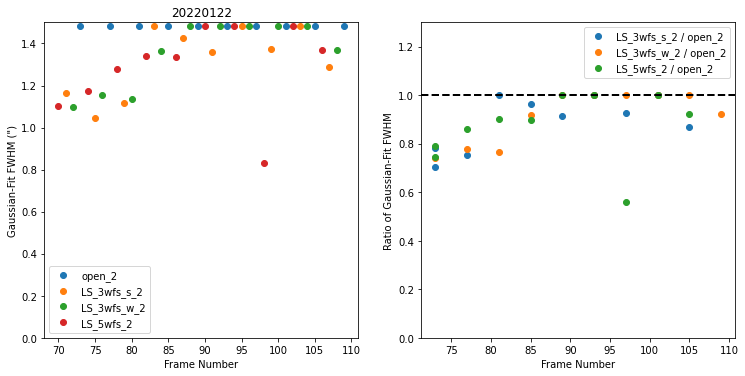

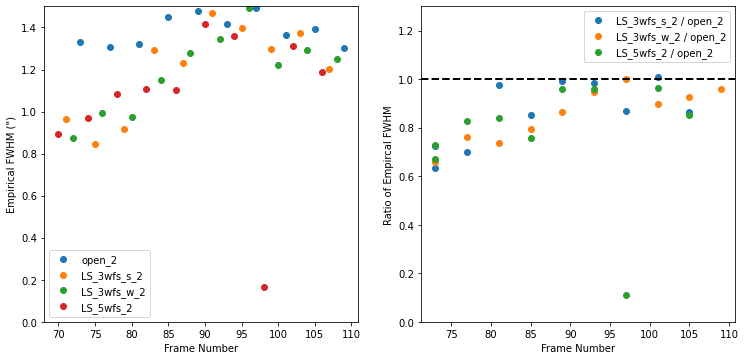

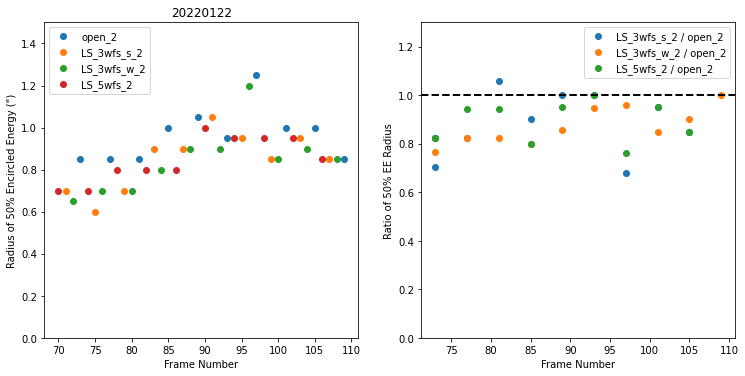

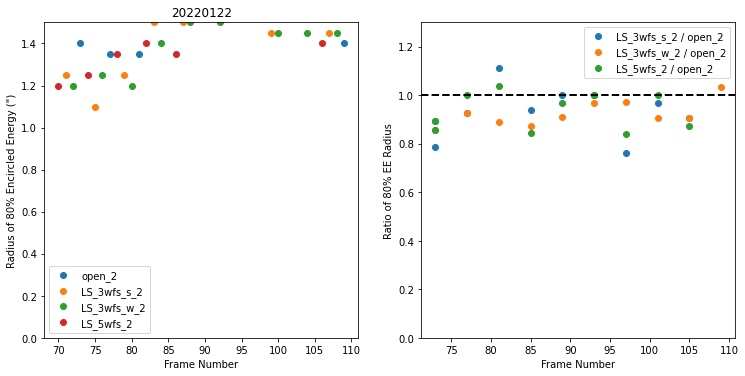

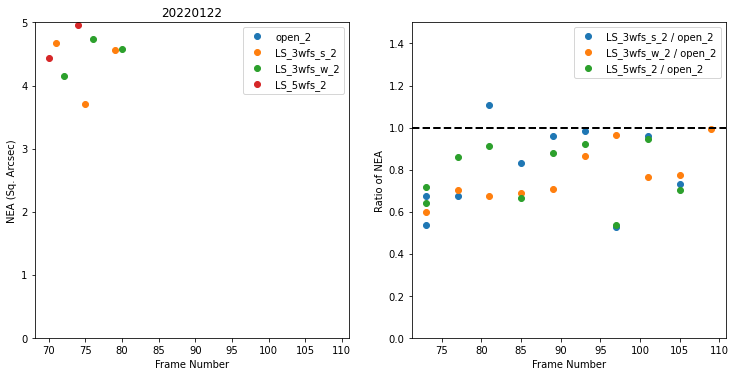

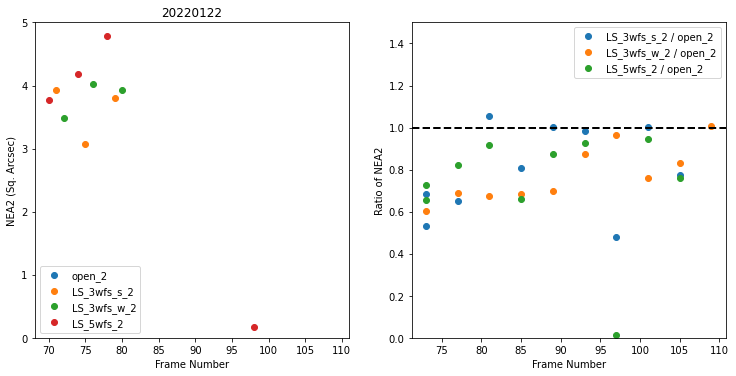

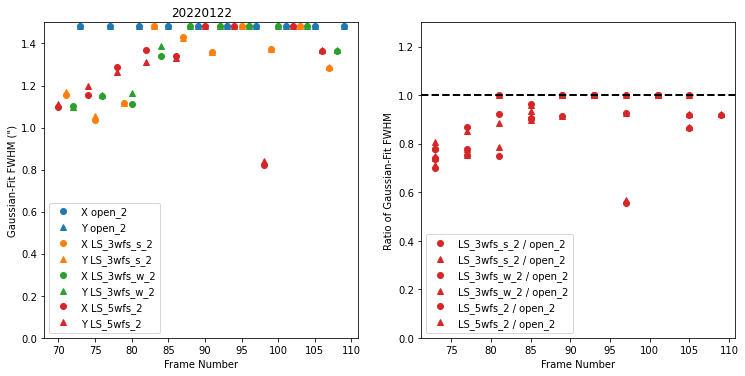

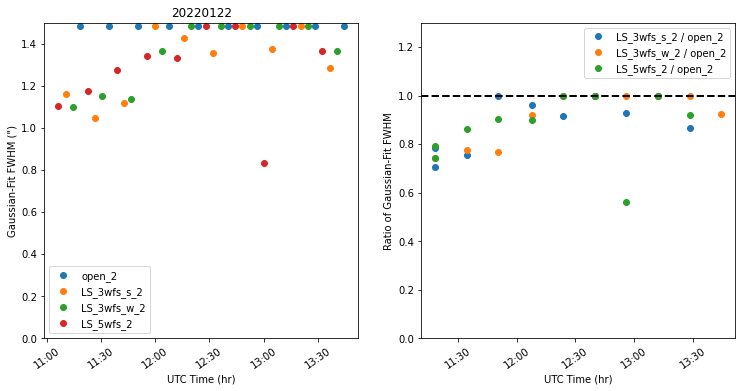

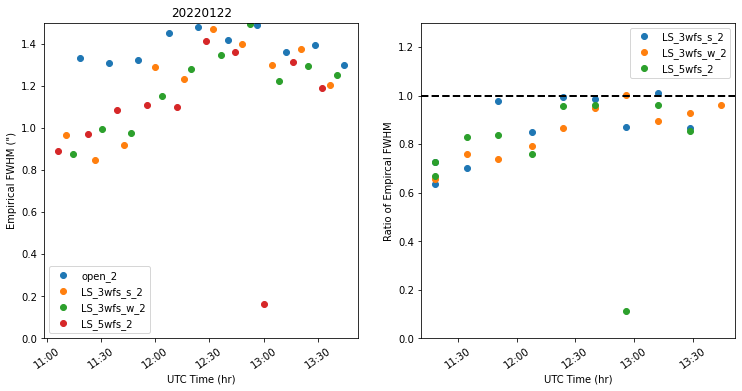

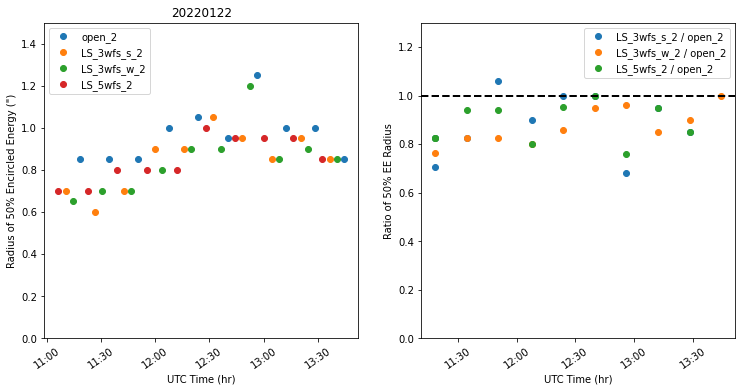

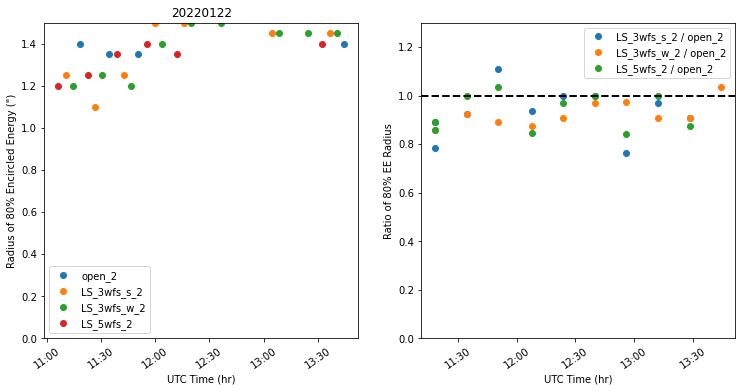

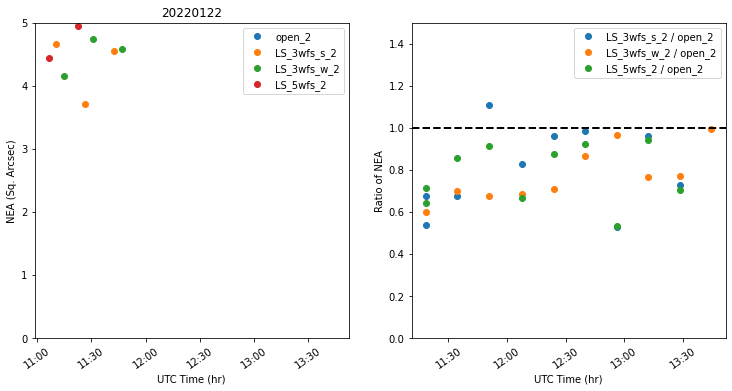

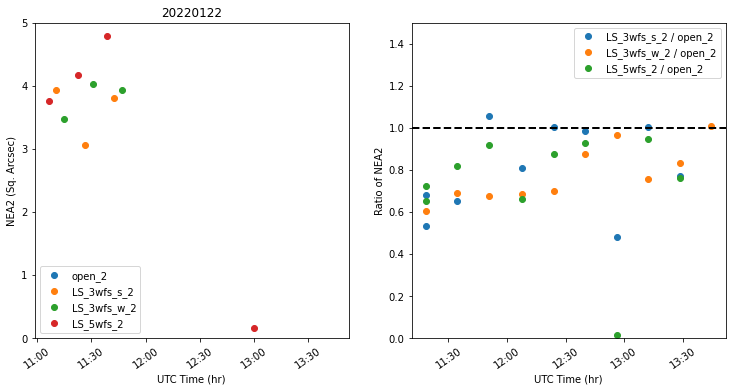

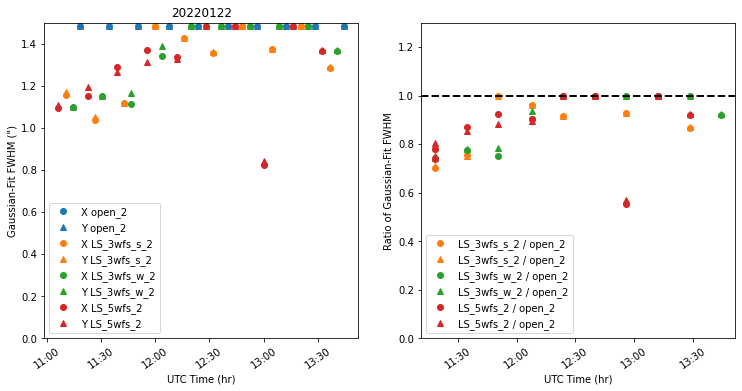

In [19]:
suffixes = ['open_2', 'LS_3wfs_s_2', 'LS_3wfs_w_2', 'LS_5wfs_2']
plot_stats.plot_stack_stats(night, suffixes=suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

# Time Variation w/MASS-DIMM

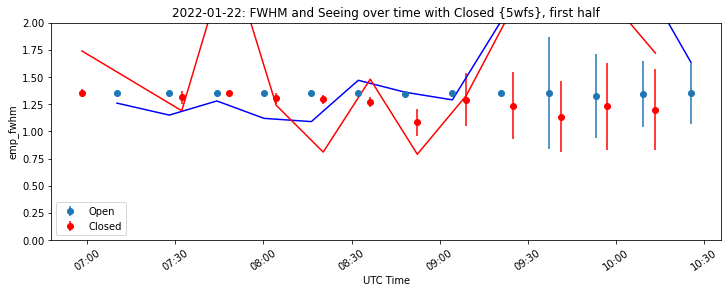

In [22]:
open_file = stats_dir +"stats_open_1_mdp.fits"
closed_file2 = stats_dir+ "stats_LS_5wfs_1_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', "2022-01-22: FWHM and Seeing over time with Closed {5wfs}, first half", plots_dir)

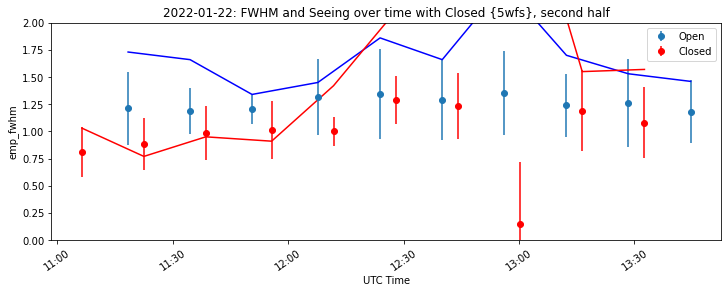

In [24]:
open_file = stats_dir +"stats_open_2_mdp.fits"
closed_file2 = stats_dir+ "stats_LS_5wfs_2_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', "2022-01-22: FWHM and Seeing over time with Closed {5wfs}, second half", plots_dir)

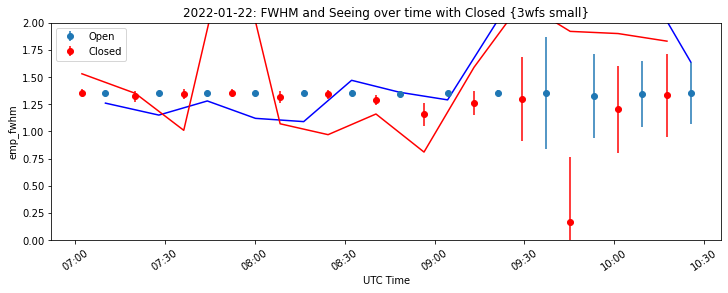

In [21]:
open_file = stats_dir +"stats_open_1_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_3wfs_s_1_mdp.fits"

plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2022-01-22: FWHM and Seeing over time with Closed {3wfs small}, first half od night", plots_dir)

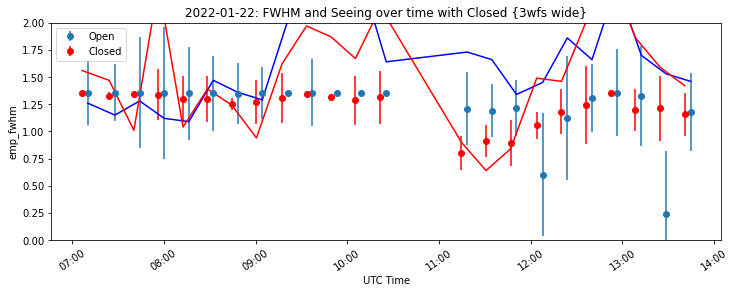

In [36]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_3wfs_w_mdp.fits"

plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2022-01-22: FWHM and Seeing over time with Closed {3wfs wide}", plots_dir)

# Aggregate Plots

['/g/lu/data/imaka/onaga/20220122/sta/reduce/stats/stats_open_1_mdp.fits', '/g/lu/data/imaka/onaga/20220122/sta/reduce/stats/stats_LS_3wfs_s_1_mdp.fits', '/g/lu/data/imaka/onaga/20220122/sta/reduce/stats/stats_LS_3wfs_w_1_mdp.fits', '/g/lu/data/imaka/onaga/20220122/sta/reduce/stats/stats_LS_5wfs_1_mdp.fits']


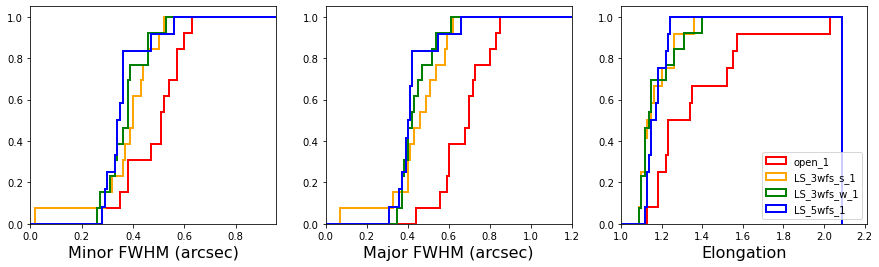

In [32]:
suffixes = ['open_1', 'LS_3wfs_s_1', 'LS_3wfs_w_1', 'LS_5wfs_1']
files = [stats_dir + 'stats_' + suffix + '_mdp.fits' for suffix in suffixes]
print(files)
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, suffixes, colors)

['/g/lu/data/imaka/onaga/20220122/sta/reduce/stats/stats_open_2_mdp.fits', '/g/lu/data/imaka/onaga/20220122/sta/reduce/stats/stats_LS_3wfs_s_2_mdp.fits', '/g/lu/data/imaka/onaga/20220122/sta/reduce/stats/stats_LS_3wfs_w_2_mdp.fits', '/g/lu/data/imaka/onaga/20220122/sta/reduce/stats/stats_LS_5wfs_2_mdp.fits']


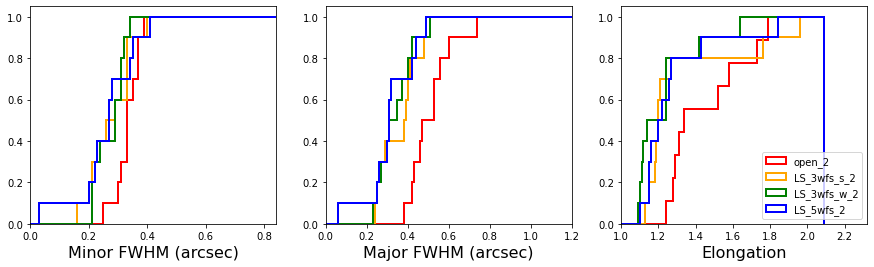

In [31]:
suffixes = ['open_2', 'LS_3wfs_s_2', 'LS_3wfs_w_2', 'LS_5wfs_2']
files = [stats_dir + 'stats_' + suffix + '_mdp.fits' for suffix in suffixes]
print(files)
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, suffixes, colors)

# Field Variability

## Closed loop, single exposure

sta048n3wfs_c_scan
Median FWHM           = 1.835"
Median FWHM (clipped) = 1.799"
Mean FWHM             = 1.899"
Mean FWHM (clipped)   = 1.786"
Stddev FWHM           = 1.224"
Stddev FWHM (clipped) = 1.041"


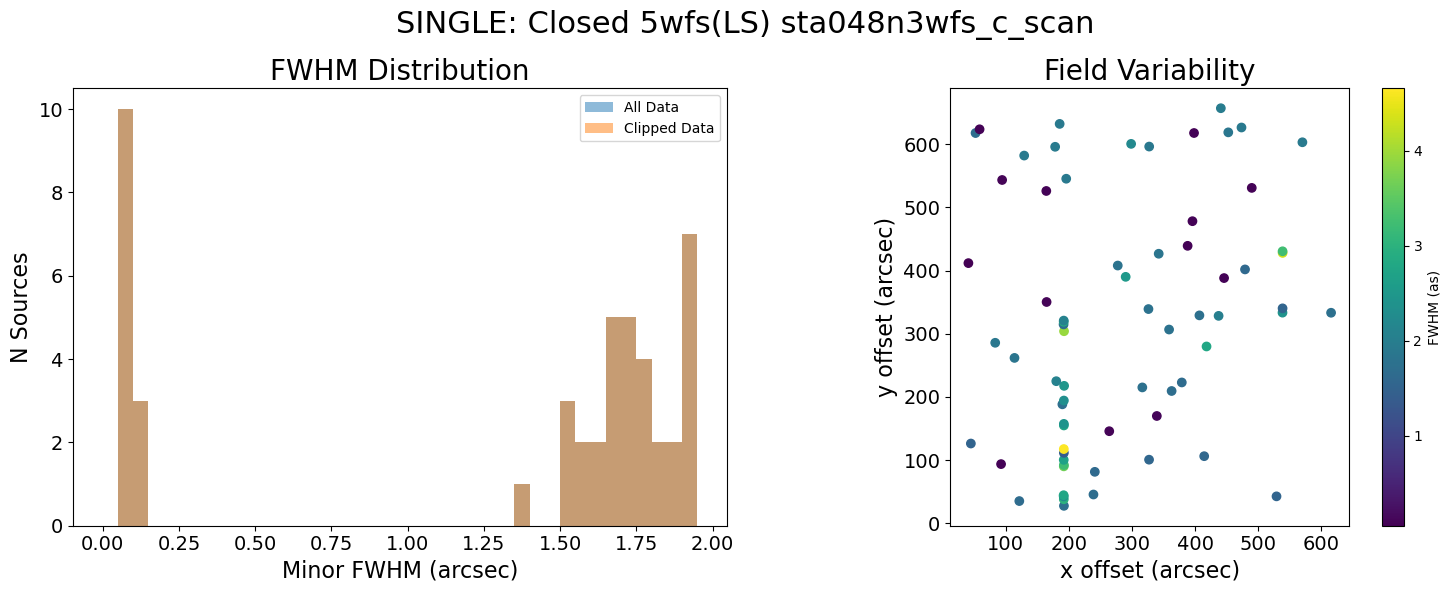

In [10]:
from importlib import reload
reload(plot_stats)
print(test_img_base)
img_file = root_dir + f'reduce/{fld}/{test_img_base}_clean.fits'
starlist = root_dir +  f'reduce/{fld}/{test_img_base}_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, f"SINGLE: Closed 5wfs(LS) {test_img_base}")

### Open Loop

In [26]:
img_file = stack_dir + 'beehive_stack__o.fits' 
starlist = stack_dir + 'beehive_stack__o_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "STACK: Open")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20220122/sta/reduce/stacks/beehive_stack__o_stars_stats_mdp.fits'

### Closed loop (3wfs_s)

In [27]:
img_file = stack_dir + 'beehive_stack_n3wfs_c.fits' 
starlist = stack_dir + 'beehive_stack_n3wfs_c_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (3wfs_s)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20220122/sta/reduce/stacks/beehive_stack_n3wfs_c_stars_stats_mdp.fits'

### Closed loop (3wfs_w)

In [28]:
img_file = stack_dir + 'beehive_stack_n3wide_c.fits' 
starlist = stack_dir + 'beehive_stack_n3wide_c_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (3wfs_wide)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20220122/sta/reduce/stacks/beehive_stack_n3wide_c.fits'

### Closed loop (5wfs)

In [29]:
img_file = stack_dir + 'beehive_stack_n5wfs_c.fits'
starlist = stack_dir + 'beehive_stack_n5wfs_c_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (5wfs)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20220122/sta/reduce/stacks/beehive_stack_n5wfs_c.fits'